# **E-Commerce Dataset Analysis using SQL**

# Introduction

* This analysis uses the Olist E-Commerce Dataset to uncover insights about sales, customer behavior, and product performance.

* The dataset includes information on orders, products, sellers, and customer reviews stored in an SQLite database.

* By answering 12 specific questions, we aim to derive actionable insights using SQL queries and visualizations.
* link dataset from kaggle:https://www.kaggle.com/datasets/terencicp/e-commerce-dataset-by-olist-as-an-sqlite-database


## **Step 1: Load Dataset**

In [ ]:
# 1. import all necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. uploading the SQLite DB to Colab
from google.colab import files
uploaded = files.upload()


Saving olist.sqlite to olist.sqlite


In [ ]:
# 2.1 locating the file path
import os
print(os.listdir())

['.config', 'olist.sqlite', 'sample_data']


In [ ]:
 # 3. create the connection to DB through SQLite
db_path = "olist.sqlite"
conn = sqlite3.connect(db_path)

## **Step 2: Explore Tables in DB**

In [ ]:
# 1. List all the tables in the DB
def view_table(table, limit=5):
    query = f"SELECT * FROM {table} LIMIT {limit}"
    return pd.read_sql_query(query, conn)


# 1. Customers:  

* ## Contains information about customers, including:
      1. customer_id: Unique identifier for each customer.
      2. customer_unique_id: Shared across multiple orders by the same customer.
      3. customer_zip_code_prefix, customer_city, and customer_state: Address-related details.

In [ ]:
display(view_table('customers'))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


2. Geolocation:

* Provides geographic details, including:
      1. geolocation_zip_code_prefix: Links to customers and sellers.
      2. geolocation_lat and geolocation_lng: Latitude and longitude for mapping.
      3. geolocation_city and geolocation_state: Location details.

In [ ]:
display(view_table('geolocation'))


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


 # 3. leads_closed:

*  ## Tracks closed leads, including:
      1. mql_id: Marketing qualified lead identifier.
      2. seller_id: Associated seller for the lead.
      3. won_date: Date when the lead converted.
      4. Business and product details such as business_segment, declared_monthly_revenue, etc

In [ ]:
display(view_table('leads_closed'))


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,None,None,None,reseller,None,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,None,None,None,reseller,None,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,None,None,None,reseller,None,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,None,None,None,None,reseller,None,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,None,None,None,manufacturer,None,0.0


# 4. leads_qualified:


* # Details about marketing qualified leads:
      1. mql_id: Unique lead identifier.
      2. first_contact_date: Date of first contact.
      3. origin: Source of the lead (e.g., landing page).

In [ ]:
display(view_table('leads_qualified'))


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


# 5. order_items:


 * ## Represents items in each order, including:
      1. order_id: Links to the orders table.
      2. product_id and seller_id: Details about products and sellers.
      3. price and freight_value: Costs associated with the item.

In [ ]:
display(view_table('order_items'))


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# 6. order_payments:

 * ## Payment-related information:
      1. order_id: Links to the orders table.
      2. payment_type: Payment method used (e.g., credit card).
      3. payment_value: Total payment amount.

In [ ]:
display(view_table('order_payments'))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


 # 7. order_reviews:

*  ## Contains customer reviews:
      1. review_id: Unique identifier for each review.
      2. review_score: Rating provided by the customer.
      3. review_comment_message: Feedback text from customers.

In [ ]:
display(view_table('order_reviews'))

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# 8. orders:

* ## Central table for order details:
      1. order_id: Unique identifier for each order.
      2. customer_id: Links to the customers table.
      3. Timestamps for order placement, approval, delivery, etc.

In [ ]:
display(view_table('orders'))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# 9.product_category_name_translation:

* ## Provides English translations for product categories:
      1. product_category_name: Original category name.
      2. product_category_name_english: Translated category name.

In [ ]:
display(view_table('product_category_name_translation'))

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 10. products:

* ## Information about products:
      1. product_id: Unique identifier for each product.
      2. Details like product_category_name, dimensions, and weight.

In [ ]:
display(view_table('products'))


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# 11. sellers:

* ## Contains seller details:
      1. seller_id: Unique identifier for each seller.
      2. seller_zip_code_prefix, seller_city, and seller_state: Location-related information.

In [ ]:
display(view_table('sellers'))


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## **Start answering questions made by the business owner:**

### **1. Which sellers have the highest-selling products, and what their total sales?**





In [ ]:
query_1 = """
SELECT
 seller_id,
 COUNT(product_id) AS product_sales_count,
 SUM(price) AS total_sales
 FROM order_items
 GROUP BY seller_id
 ORDER BY product_sales_count DESC
"""

In [ ]:
query1Results = pd.read_sql_query(query_1, conn)
display(query1Results.head(10))

,seller_id,product_sales_count,total_sales
0,6560211a19b47992c3666cc44a7e94c0,2033,123304.83
1,4a3ca9315b744ce9f8e9374361493884,1987,200472.92
2,1f50f920176fa81dab994f9023523100,1931,106939.21
3,cc419e0650a3c5ba77189a1882b7556a,1775,104288.42
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,160236.57
5,955fee9216a65b617aa5c0531780ce60,1499,135171.70
6,1025f0e2d44d7041d6cf58b6550e0bfa,1428,138968.55
7,7c67e1448b00f6e969d365cea6b010ab,1364,187923.89
8,ea8482cd71df3c1969d7b9473ff13abc,1203,37177.52
9,7a67c85e85bb2ce8582c35f2203ad736,1171,141745.53


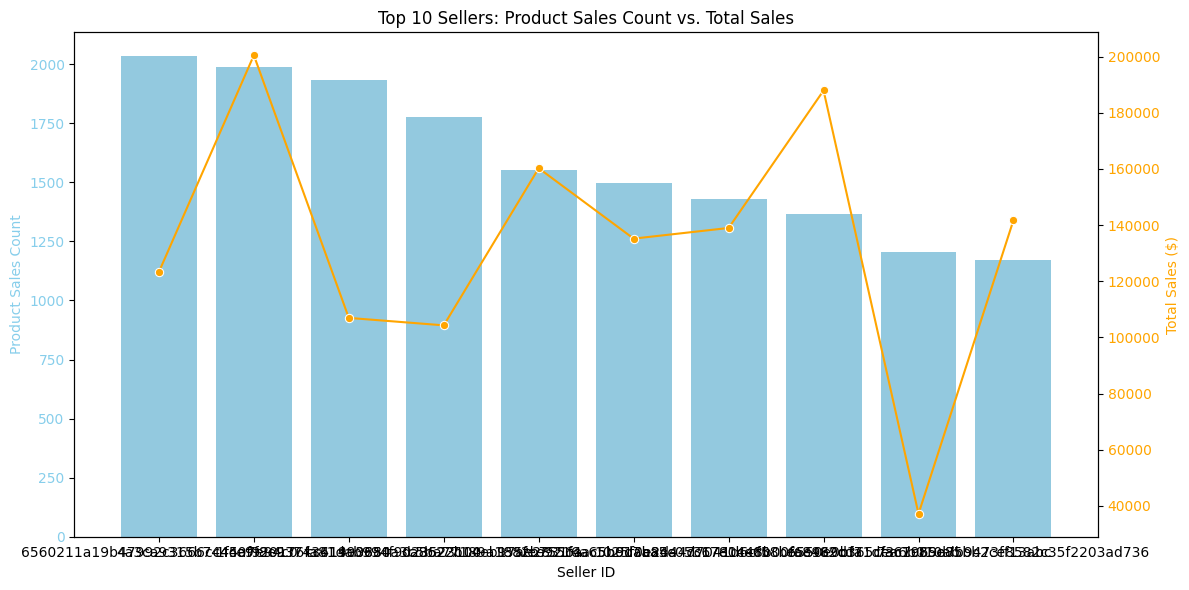

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar plot for product_sales_count
sns.barplot(data=query1Results.head(10), x='seller_id', y='product_sales_count', color='skyblue', ax=ax1)
ax1.set_xlabel('Seller ID')
ax1.set_ylabel('Product Sales Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# second y-axis to plot total_sales
ax2 = ax1.twinx()
sns.lineplot(data=query1Results.head(10), x='seller_id', y='total_sales', color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Total Sales ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Sellers: Product Sales Count vs. Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


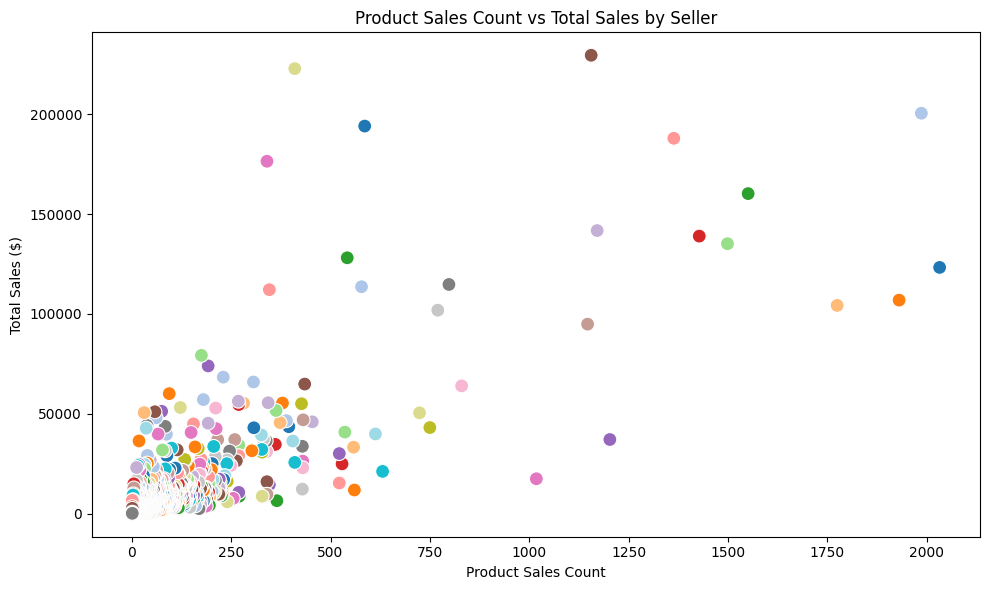

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=query1Results, x='product_sales_count', y='total_sales', hue='seller_id', palette='tab20', s=100, legend = False)
plt.title('Product Sales Count vs Total Sales by Seller')
plt.xlabel('Product Sales Count')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()



### **2. Which customers place the highest number of orders, and what is their total purchase value?**




In [ ]:
query_2 = """
SELECT
 c.customer_id,
 COUNT(o.order_id) AS Total_orders,
 SUM(op.payment_value) AS Total_purchase_value
 FROM customers c
 JOIN orders o ON c.customer_id = o.customer_id
 JOIN order_payments op ON o.order_id = op.order_id
 GROUP BY c.customer_id
 ORDER BY Total_purchase_value DESC, Total_orders DESC,
"""

In [ ]:
query2Results = pd.read_sql_query(query_2, conn)
display(query2Results.head(10))

,customer_id,Total_orders,Total_purchase_value
0,1617b1357756262bfa56ab541c47bc16,1,13664.08
1,ec5b2ba62e574342386871631fafd3fc,1,7274.88
2,c6e2731c5b391845f6800c97401a43a9,1,6929.31
3,f48d464a0baaea338cb25f816991ab1f,1,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,1,6726.66
5,05455dfa7cd02f13d132aa7a6a9729c6,1,6081.54
6,df55c14d1476a9a3467f131269c2477f,1,4950.34
7,e0a2412720e9ea4f26c1ac985f6a7358,1,4809.44
8,24bbf5fd2f2e1b359ee7de94defc4a15,1,4764.34
9,3d979689f636322c62418b6346b1c6d2,1,4681.78


In [ ]:
query_2_ = """
SELECT
 c.customer_id,
 COUNT(o.order_id) AS Total_orders,
 SUM(op.payment_value) AS Total_purchase_value
 FROM customers c
 JOIN orders o ON c.customer_id = o.customer_id
 JOIN order_payments op ON o.order_id = op.order_id
 GROUP BY c.customer_id
 ORDER BY Total_orders DESC, Total_purchase_value DESC
"""

In [ ]:
query2_Results = pd.read_sql_query(query_2_, conn)
display(query2_Results.head(10))

,customer_id,Total_orders,Total_purchase_value
0,9af2372a1e49340278e7c1ef8d749f34,29,457.99
1,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,62.68
2,b246eeed30b362c09d867b9e598bee51,22,40.85
3,270c23a11d024a44c896d1894b261a83,21,161.32
4,13aa59158da63ba0e93ec6ac2c07aacb,19,205.74
5,eed931d3a5222a9a511d18be7fd2a5ba,19,82.73
6,de832e8dbb1f588a47013e53feaa67cc,15,740.76
7,1eebfdb7083031b40f727fb71f6cd5b2,15,86.99
8,d1ea705f2fdd8f98eff86c2691652e60,14,529.55
9,7bb57d182bdc11653fac1593436df8bf,14,100.57


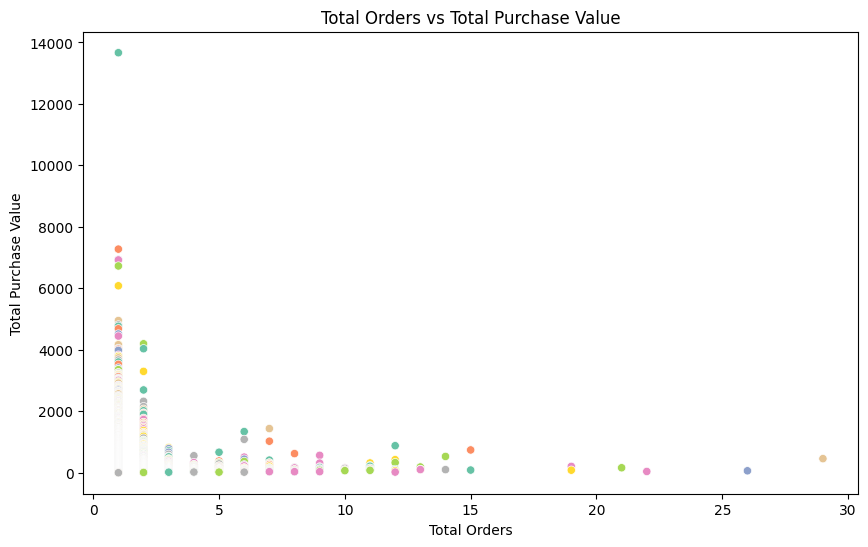

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=query2Results, x='Total_orders', y='Total_purchase_value', hue='customer_id', palette='Set2', legend = False)
plt.title('Total Orders vs Total Purchase Value')
plt.xlabel('Total Orders')
plt.ylabel('Total Purchase Value')
plt.show()

In [ ]:
# Q3
query_3 = """
SELECT
    pc.product_category_name AS category,
    COUNT(o.order_id) AS total_orders,
    SUM(p.payment_value) AS total_revenue
FROM
    products pc
JOIN
    order_items oi ON pc.product_id = oi.product_id
JOIN
    orders o ON oi.order_id = o.order_id
JOIN
    order_payments p ON o.order_id = p.order_id
GROUP BY
    pc.product_category_name
ORDER BY
    total_orders DESC;
"""



In [ ]:
results_3 = pd.read_sql_query(query_3, conn)
print(results_3)

                                         category  total_orders  total_revenue
0                                 cama_mesa_banho         11823     1712553.67
1                                    beleza_saude          9972     1657373.12
2                                   esporte_lazer          8945     1392127.56
3                                moveis_decoracao          8744     1430176.39
4                          informatica_acessorios          8082     1585330.45
..                                            ...           ...            ...
69  portateis_cozinha_e_preparadores_de_alimentos            15        4335.65
70                              cds_dvds_musicais            14        1199.43
71                                       pc_gamer            10        2174.43
72                  fashion_roupa_infanto_juvenil             8         785.67
73                             seguros_e_servicos             2         324.51

[74 rows x 3 columns]


In [ ]:
#Q4
query_4 = """
SELECT
    c.customer_state AS state,
    COUNT(o.order_id) AS total_orders,
    AVG(orv.review_score) AS avg_review_score
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_reviews orv ON o.order_id = orv.order_id
GROUP BY c.customer_state
ORDER BY total_orders DESC, avg_review_score DESC;
"""


In [ ]:
result_4 = pd.read_sql_query(query_4, conn)
print (result_4)

   state  total_orders  avg_review_score
0     SP         41690          4.173951
1     RJ         12765          3.874971
2     MG         11625          4.136172
3     RS          5483          4.133321
4     PR          5038          4.180032
5     SC          3623          4.071764
6     BA          3357          3.860888
7     DF          2148          4.064711
8     GO          2024          4.042490
9     ES          2016          4.041667
10    PE          1646          4.011543
11    CE          1329          3.851016
12    PA           968          3.849174
13    MT           903          4.102990
14    MA           746          3.764075
15    MS           724          4.118785
16    PB           531          4.018832
17    PI           491          3.920570
18    RN           482          4.105809
19    AL           414          3.751208
20    SE           349          3.808023
21    TO           279          4.096774
22    RO           252          4.051587
23    AM        

<ipython-input-15-bb0e706120f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_orders', data=result_4, palette='viridis')


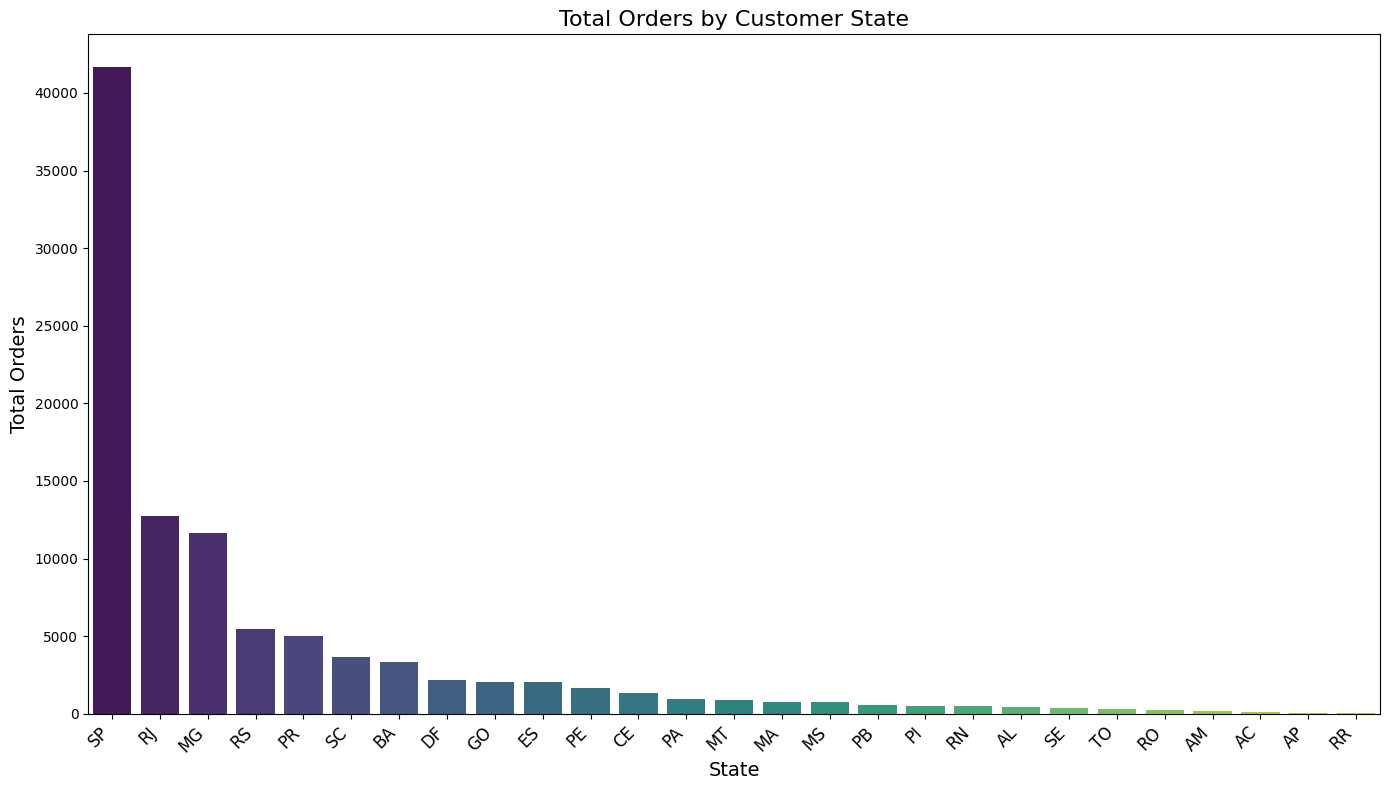

In [ ]:
#Visualization for Q4
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='total_orders', data=result_4, palette='viridis')
plt.title('Total Orders by Customer State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

### **Step 3: Analysis Questions from Product Owner**

Question 5: What are the top reasons for customer complaints in low-rated reviews (score ≤ 2)?

In [ ]:
query_5 = """
SELECT
    r.review_comment_message AS complaint_reason,
    COUNT(*) AS complaint_count
FROM
    order_reviews r
WHERE
    r.review_score <= 2
    AND r.review_comment_message IS NOT NULL
GROUP BY
    r.review_comment_message
ORDER BY
    complaint_count DESC
LIMIT 10;
"""

In [ ]:
results = pd.read_sql_query(query_5, conn)
print(results)

              complaint_reason  complaint_count
0         Não recebi o produto               33
1        Não recebi o produto                13
2                   Não recebi               12
3   Ainda não recebi o produto               11
4             Ainda não recebi               11
5         nao recebi o produto               10
6         Nao recebi o produto               10
7  Ainda não recebi o produto                 9
8         não recebi o produto                7
9         Produto não entregue                7


Question 6: What are the most popular payment methods among customers, and how does payment method preference vary by region?

In [ ]:
query_6_region= """
SELECT
    c.customer_state,
    p.payment_type,
    COUNT(*) AS payment_count
FROM
    order_payments p
JOIN
    orders o ON p.order_id = o.order_id
JOIN
    customers c ON o.customer_id = c.customer_id
GROUP BY
    c.customer_state, p.payment_type
ORDER BY
    c.customer_state, payment_count DESC;
"""

In [ ]:
query_6_payment_methods = """
SELECT
    p.payment_type,
    COUNT(*) AS payment_count
FROM
    order_payments p
GROUP BY
    p.payment_type
ORDER BY
    payment_count DESC;
"""

In [ ]:
results= pd.read_sql_query(query_6_region, conn)
print(results)

    customer_state payment_type  payment_count
0               AC  credit_card             61
1               AC       boleto             16
2               AC      voucher              5
3               AC   debit_card              2
4               AL  credit_card            341
..             ...          ...            ...
101             SP  not_defined              3
102             TO  credit_card            197
103             TO       boleto             76
104             TO      voucher             24
105             TO   debit_card              4

[106 rows x 3 columns]


In [ ]:
results= pd.read_sql_query(query_6_payment_methods, conn)
print(results)

  payment_type  payment_count
0  credit_card          76795
1       boleto          19784
2      voucher           5775
3   debit_card           1529
4  not_defined              3


**Question 7:** Which products have the highest return rates based on reviews or order cancellations?

In [ ]:
query_7 = """
SELECT
    p.product_id,
    p.product_category_name,
    COUNT(o.order_id) AS total_orders,
    SUM(CASE WHEN o.order_status = 'canceled' THEN 1 ELSE 0 END) AS cancellations,
    (SUM(CASE WHEN o.order_status = 'canceled' THEN 1 ELSE 0 END) * 1.0 / COUNT(o.order_id)) AS return_rate
FROM
    orders o
JOIN
    order_items oi ON o.order_id = oi.order_id
JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    p.product_id, p.product_category_name
ORDER BY
    return_rate DESC
LIMIT 10;
"""

In [ ]:
results = pd.read_sql_query(query_7, conn)
print(results)

                         product_id product_category_name  total_orders  \
0  01886ce599b5837b3e1966cdafacd080       cama_mesa_banho             1   
1  0350ac874c8937571b129554110ec3b6          dvds_blu_ray             1   
2  03b10f5e3ef07cfc27a025adca3fd0be         esporte_lazer             1   
3  03dc797f6faaa324fb633c518ff3f326          beleza_saude             1   
4  0418d6ca9336c4a7ef9667aac0be1976        consoles_games             1   
5  059fd0cc43081303f7c0d7770ab53d52         esporte_lazer             1   
6  05f97ad4ce078ed1de8882e1824eb07f            brinquedos             1   
7  05fa60020215fd65f8f8b9dd441f864b          beleza_saude             1   
8  07883aa96515a898e1b9ddf0537a1b56      moveis_decoracao             1   
9  0915ff4c13dc62982f2a0a3ae788945c       cama_mesa_banho             1   

   cancellations  return_rate  
0              1          1.0  
1              1          1.0  
2              1          1.0  
3              1          1.0  
4             

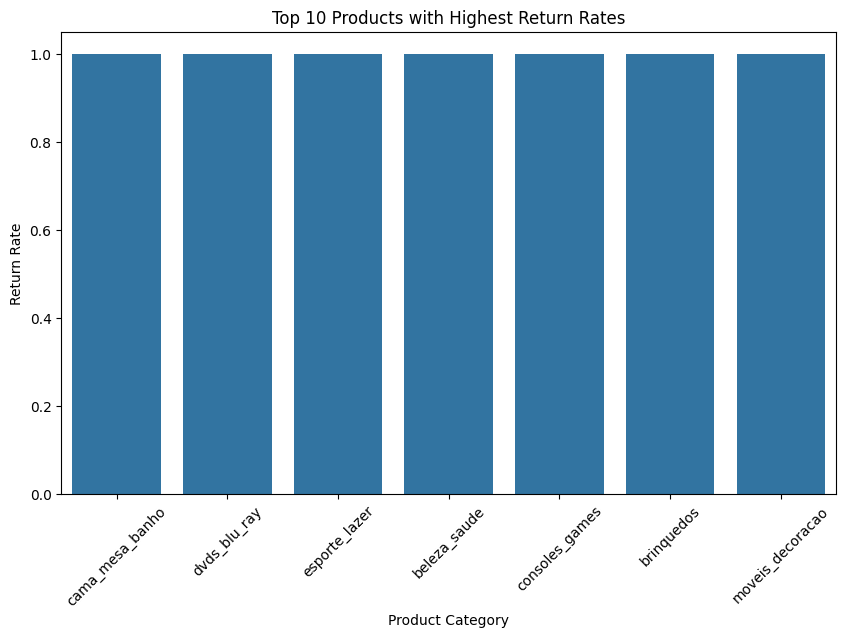

In [ ]:
# Visualization for Question 7
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x="product_category_name", y="return_rate")
plt.xticks(rotation=45)
plt.title("Top 10 Products with Highest Return Rates")
plt.xlabel("Product Category")
plt.ylabel("Return Rate")
plt.show()

**Question 8:**  What is the average review score by product category?

In [ ]:
query_8 = """
SELECT
    p.product_category_name,
    AVG(r.review_score) AS avg_review_score
FROM
    order_reviews r
JOIN
    order_items oi ON r.order_id = oi.order_id
JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    p.product_category_name
ORDER BY
    avg_review_score DESC;
"""

In [ ]:
results = pd.read_sql_query(query_8, conn)
print(results)

                            product_category_name  avg_review_score
0                               cds_dvds_musicais          4.642857
1                   fashion_roupa_infanto_juvenil          4.500000
2                          livros_interesse_geral          4.446266
3              construcao_ferramentas_ferramentas          4.444444
4                                          flores          4.419355
..                                            ...               ...
69                              moveis_escritorio          3.493183
70                                       pc_gamer          3.333333
71  portateis_cozinha_e_preparadores_de_alimentos          3.266667
72                                fraldas_higiene          3.256410
73                             seguros_e_servicos          2.500000

[74 rows x 2 columns]


<ipython-input-22-2fd63c51af28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


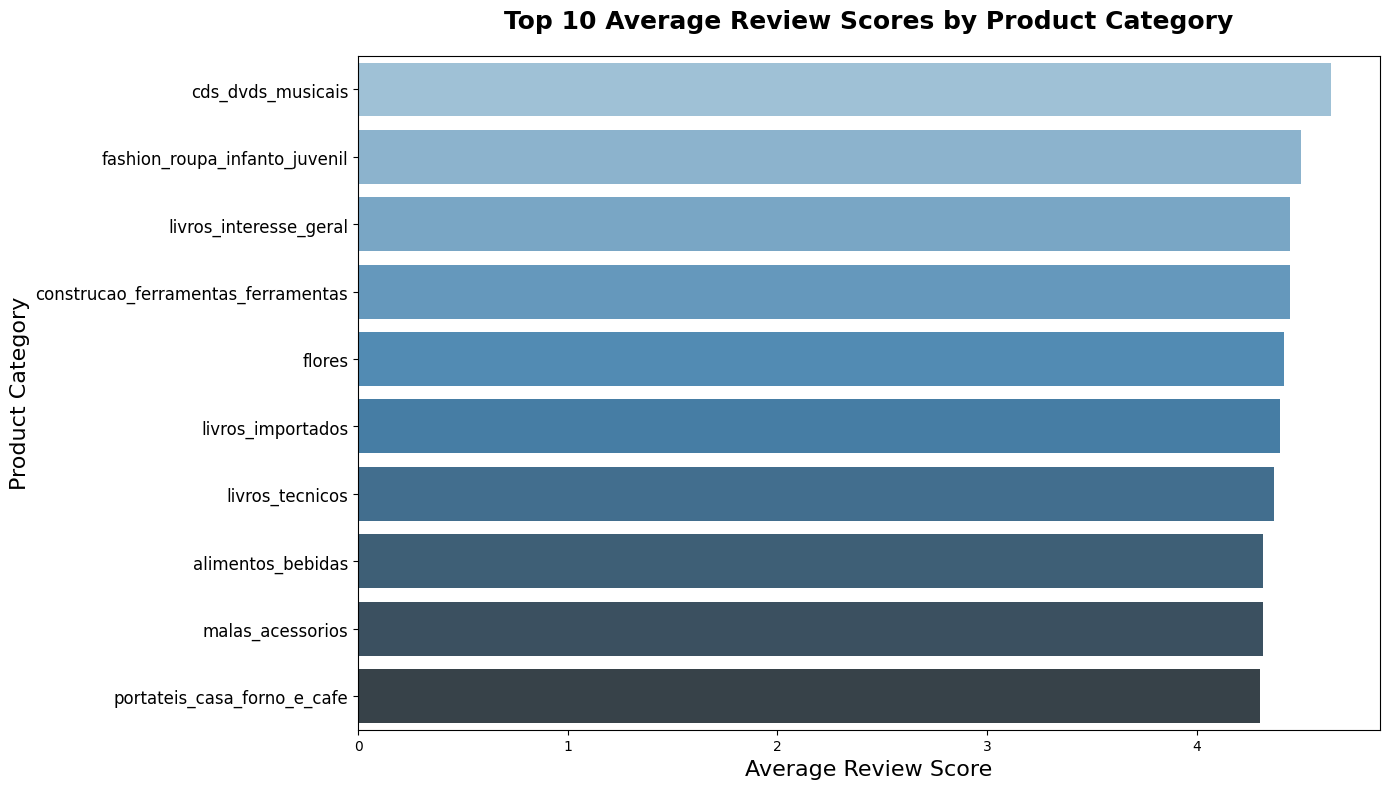

In [ ]:
top_categories = results.sort_values(by='avg_review_score', ascending=False).head(10)
plt.figure(figsize=(14, 8))

sns.barplot(
    data=top_categories,
    x="avg_review_score",
    y="product_category_name",
    palette="Blues_d"
)

plt.title("Top 10 Average Review Scores by Product Category", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Average Review Score", fontsize=16)
plt.ylabel("Product Category", fontsize=16)

plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


## 9.How many negative reviews (score < 3) has each seller received?

In [ ]:
query = """
SELECT
    s.seller_id,
    COUNT(*) AS negative_review_count
FROM
    order_reviews r
INNER JOIN
    order_items oi ON r.order_id = oi.order_id
JOIN
    sellers s ON oi.seller_id = s.seller_id
WHERE
    r.review_score < 3
GROUP BY
    s.seller_id
ORDER BY
    negative_review_count DESC;
"""



In [ ]:
# Execute the query and load the results into a pandas DataFrame
result = pd.read_sql_query(query, conn)

# Print the results
print(result)

                             seller_id  negative_review_count
0     7c67e1448b00f6e969d365cea6b010ab                    402
1     4a3ca9315b744ce9f8e9374361493884                    392
2     6560211a19b47992c3666cc44a7e94c0                    361
3     1f50f920176fa81dab994f9023523100                    351
4     1025f0e2d44d7041d6cf58b6550e0bfa                    294
...                                ...                    ...
1906  02c988090b766852e088c69d7fb3b551                      1
1907  02a2272692e13558373c66db98f05e2e                      1
1908  013900e863eace745d3ec7614cab5b1a                      1
1909  001e6ad469a905060d959994f1b41e4f                      1
1910  0015a82c2db000af6aaaf3ae2ecb0532                      1

[1911 rows x 2 columns]


<ipython-input-31-9dbba705bd3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


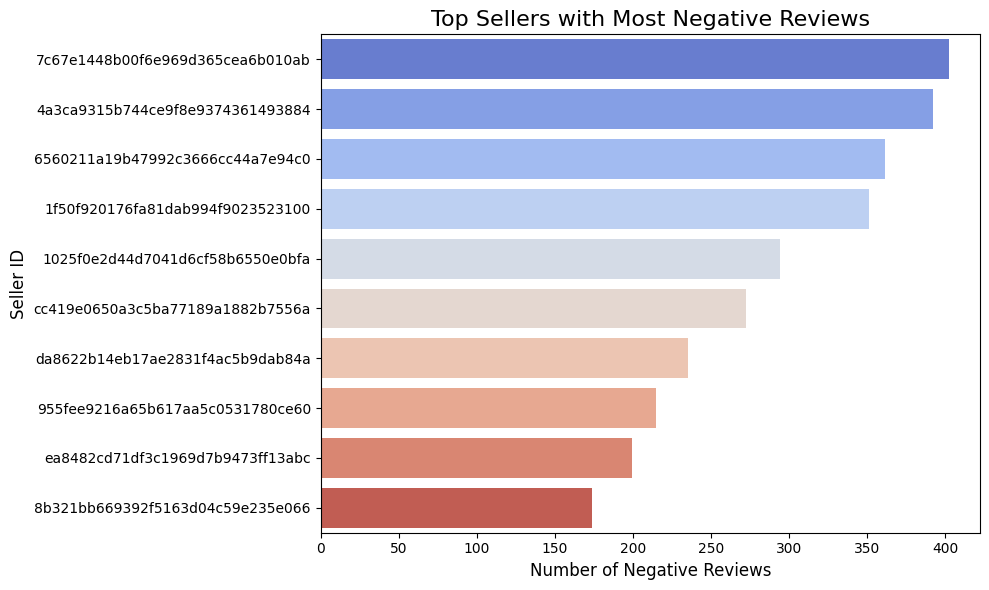

In [ ]:
top_sellers = result.head(10)  # Adjust the number as needed

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_sellers,
    x="negative_review_count",
    y="seller_id",
    palette="coolwarm",
)

# Add titles and labels
plt.title("Top Sellers with Most Negative Reviews", fontsize=16)
plt.xlabel("Number of Negative Reviews", fontsize=12)
plt.ylabel("Seller ID", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## 10.How many order have been placed in each state?

In [ ]:
query = """
SELECT
    c.customer_state,
    COUNT(o.order_id) AS total_orders
FROM
    orders o
INNER JOIN
    customers c ON o.customer_id = c.customer_id
GROUP BY
    c.customer_state
ORDER BY
    total_orders DESC;
"""

In [ ]:
# Execute the query and load the results into a pandas DataFrame
result = pd.read_sql_query(query,conn )

# Print the results
print(result)


   customer_state  total_orders
0              SP         41746
1              RJ         12852
2              MG         11635
3              RS          5466
4              PR          5045
5              SC          3637
6              BA          3380
7              DF          2140
8              ES          2033
9              GO          2020
10             PE          1652
11             CE          1336
12             PA           975
13             MT           907
14             MA           747
15             MS           715
16             PB           536
17             PI           495
18             RN           485
19             AL           413
20             SE           350
21             TO           280
22             RO           253
23             AM           148
24             AC            81
25             AP            68
26             RR            46


<ipython-input-34-89e8e2f0027b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


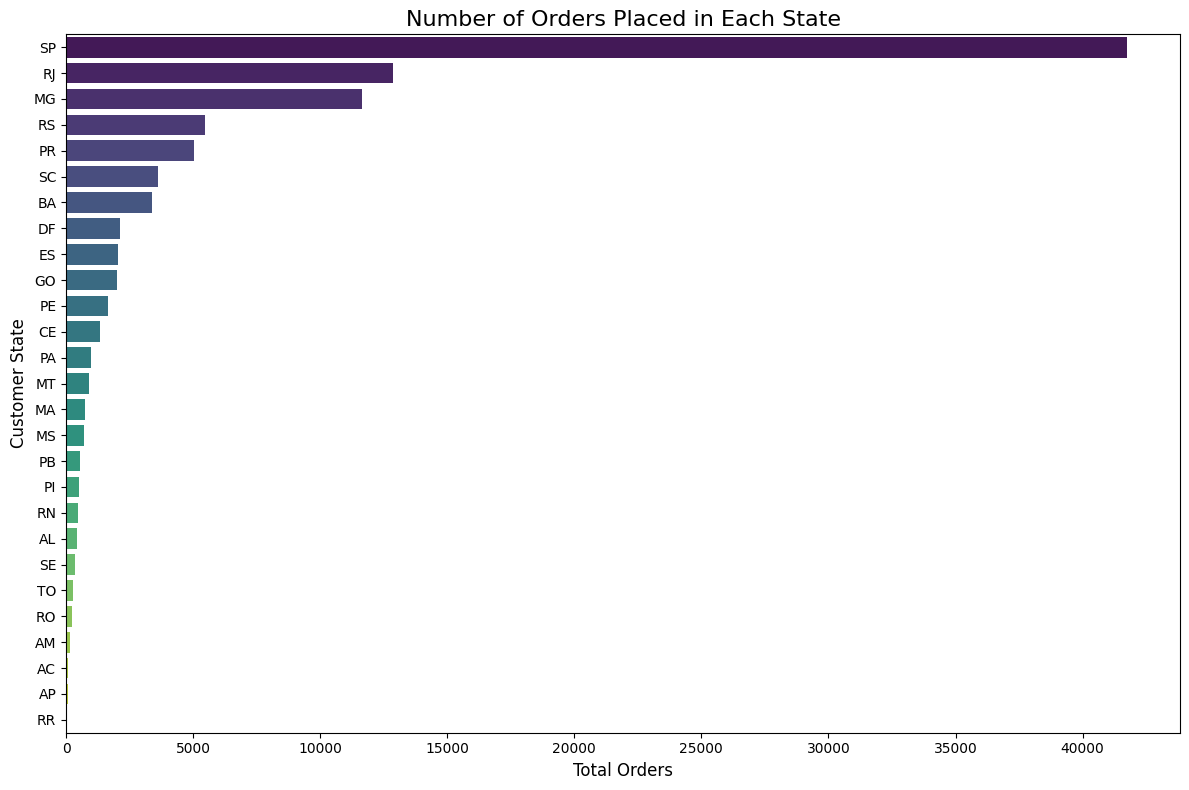

In [ ]:
# Plot the results as a bar chart
plt.figure(figsize=(12, 8))

# Sort the states by total orders for better readability
sns.barplot(
    data=result,
    x="total_orders",
    y="customer_state",
    palette="viridis",
)

# Add titles and labels
plt.title("Number of Orders Placed in Each State", fontsize=16)
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Customer State", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# 11 - Average Time Between Order Placement and Delivery for All Regions

In [ ]:
query = """
SELECT
    c.customer_state AS region,
    AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)) AS avg_delivery_time
FROM
    orders o
JOIN
    customers c
ON
    o.customer_id = c.customer_id
WHERE
    o.order_delivered_customer_date IS NOT NULL
GROUP BY
    c.customer_state;
"""

In [ ]:
# Execute the query and load the results into a pandas DataFrame
result = pd.read_sql_query(query,conn)

# Print the results
print(result)

   region  avg_delivery_time
0      AC          21.035713
1      AL          24.543855
2      AM          26.425991
3      AP          27.185068
4      BA          19.335466
5      CE          21.266579
6      DF          12.967568
7      ES          15.789307
8      GO          15.606339
9      MA          21.572976
10     MG          12.010258
11     MS          15.618319
12     MT          18.055756
13     PA          23.772917
14     PB          20.426768
15     PE          18.448323
16     PI          19.457098
17     PR          11.991582
18     RJ          15.310053
19     RN          19.278156
20     RO          19.372037
21     RR          29.387546
22     RS          15.300276
23     SC          14.959297
24     SE          21.519788
25     SP           8.761357
26     TO          17.658063


# 12 - Average Size and Weight of Products Sold by Category

In [ ]:
query = """
SELECT
    p.product_category_name AS category,
    AVG(p.product_length_cm) AS avg_length_cm,
    AVG(p.product_height_cm) AS avg_height_cm,
    AVG(p.product_width_cm) AS avg_width_cm,
    AVG(p.product_weight_g) AS avg_weight_g
FROM
    order_items oi
JOIN
    products p
ON
    oi.product_id = p.product_id
GROUP BY
    p.product_category_name;
"""

In [ ]:
# Execute the query and load the results into a pandas DataFrame
result = pd.read_sql_query(query,conn)

# Print the results
print(result)

                     category  avg_length_cm  avg_height_cm  avg_width_cm  \
0                        None      26.139344      14.311475     19.817150   
1   agro_industria_e_comercio      28.938679      23.787736     20.867925   
2                   alimentos      19.327451      13.666667     15.631373   
3           alimentos_bebidas      21.751799      15.924460     16.676259   
4                       artes      49.043062       8.535885     36.531100   
..                        ...            ...            ...           ...   
69    sinalizacao_e_seguranca      34.296482      28.693467     21.150754   
70   tablets_impressao_imagem      25.506024       9.626506     23.277108   
71                  telefonia      18.389439       6.354675     13.399120   
72             telefonia_fixa      19.867424      10.428030     16.018939   
73      utilidades_domesticas      32.128518      24.209219     24.931792   

    avg_weight_g  
0    1652.035939  
1    3625.113208  
2     658.115686  